In [30]:
import numpy as np
import matplotlib.pyplot as plt 

In [31]:
def load_data(filename):
    X = []
    y = []
    with open(filename, 'r') as file:
        for line in file:
            values = [float(x) for x in line.strip().split(',') if x]
            if len(values) >= 3:
                X.append(values[:2])
                y.append(values[2])

    return np.array(X), np.array(y)

In [32]:
def predict(X, weights, bias):
    return np.where((np.dot(X, weights) + bias) >= 0, 1, 0)

In [33]:
def plot_decision_boundary(X, y, weights, bias, color='r', linestyle='-', alpha=1.0):
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', label='Class 1')
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='x', label='Class 0')

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x = np.linspace(x_min, x_max, 100)

    y = -(weights[0]*x + bias)/weights[1]

    plt.plot(x, y, color=color, linestyle=linestyle, alpha=alpha)
    plt.xlabel('X1')
    plt.ylabel('X2')

In [34]:
def perceptron(X, y, learning_rate=0.1, n_iterations=100):
    n_samples, n_features = X.shape

    weights = np.random.randn(n_features)
    bias = np.random.randn()

    initial_bias = bias
    initial_weights = weights.copy()

    all_weights = [(initial_weights.copy(), initial_bias)]

    #training
    for _ in range(n_iterations):
        for i in range(n_samples):
            #make prediction
            prediction = predict(X[i], weights, bias)

            #update weights and bias if misclassified
            if prediction == 0 and y[i] == 1:
                weights += learning_rate * X[i]
                bias += learning_rate

            elif prediction == 1 and y[i] == 0:
                weights -= learning_rate * X[i]
                bias -= learning_rate

            all_weights.append((weights.copy(), bias))

    return weights, bias, initial_weights, initial_bias, all_weights

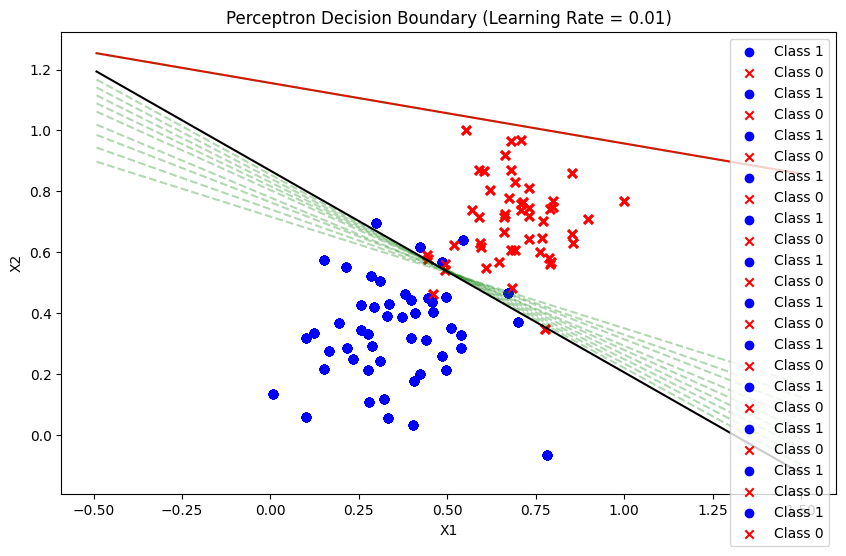

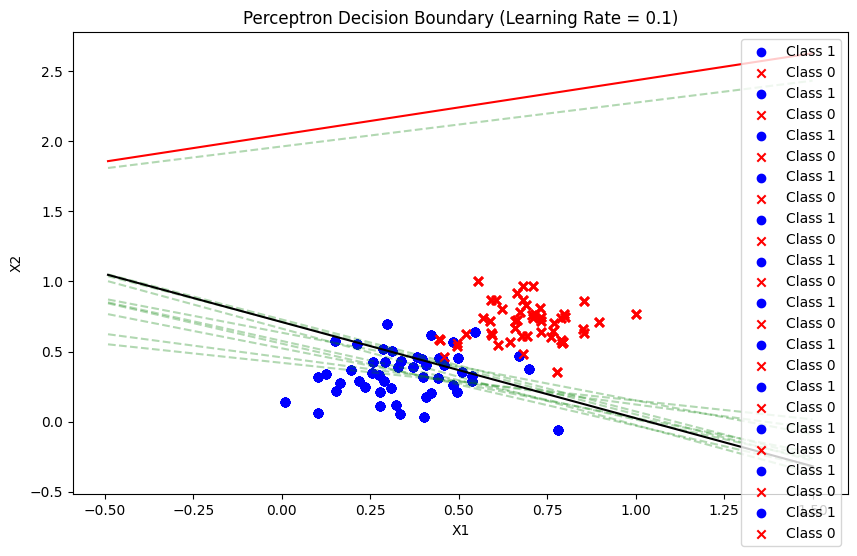

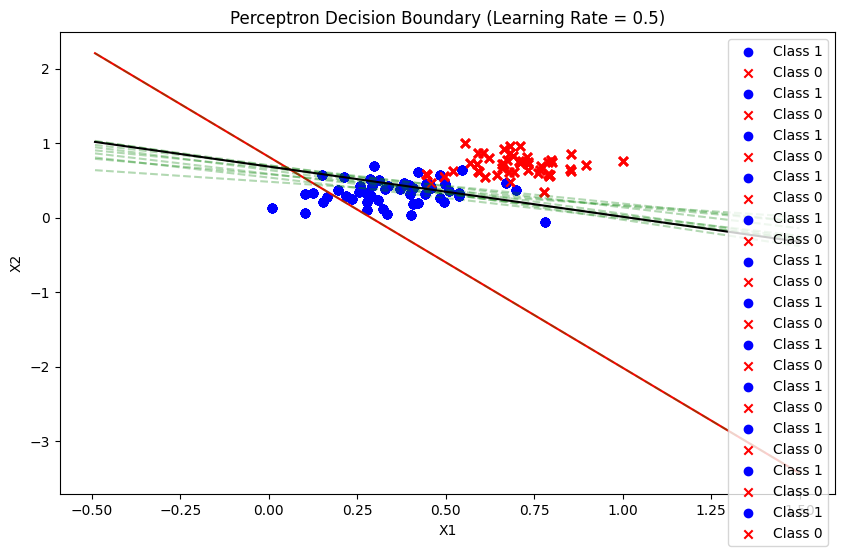

In [39]:
def main():
    X, y = load_data('data.csv')

    learning_rates = [0.01, 0.1, 0.5]

    for lr in learning_rates:
        plt.figure(figsize=(10,6))
        plt.title(f'Perceptron Decision Boundary (Learning Rate = {lr})')

        #train perceptron
        weights, bias, initial_weights, initial_bias, all_weights = perceptron(X, y, learning_rate=lr)

        #plot inital decision boundary
        plot_decision_boundary(X, y, initial_weights, initial_bias, color='red', linestyle='-', alpha=1.0)

        #plot intermediate decision boundaries
        for i in range(1, len(all_weights) - 1, max(1, len(all_weights)//10)):
            w, b = all_weights[i]
            plot_decision_boundary(X, y, w, b, color='green', linestyle='--', alpha=0.3)

        plot_decision_boundary(X, y, weights, bias, color='black', linestyle='-', alpha=1.0)

        plt.legend()
        plt.show()

if __name__ == "__main__":
    main()